This notebook produces a preliminary plot of the variable importance held by hashes from each genome, emphasizing the amount of variable importance that could be assigned to multiple genomes given hash overlap between genome FracMinHash sketches.

In [1]:
setwd("..")

In [8]:
library(dplyr)
library(rjson)
library(purrr)
library(readr)
library(tidyr)
library(ggplot2)

In [6]:
# shared assemblies are present in all models; read in smallest set
# reads in signatures of matches and generates a hash:assembly dataframe
sig_json <- fromJSON(file = "outputs/gather/SRP057027_vita_vars_gtdb_seed6.matches")
hash_to_assembly <- lapply(sig_json, data.frame, stringsAsFactors = FALSE)
hash_to_assembly <- bind_rows(hash_to_assembly)
length(unique(hash_to_assembly$name))
unique(hash_to_assembly$name)

[1] 1117

[1] "GCA_002893375.1 Cyclospora cayetanensis strain=CDC:HCVA02:15, ASM289337v1"                                                      
   [2] "GCF_003584705.1 Lachnospiraceae bacterium GAM79 strain=GAM79, ASM358470v1"                                                      
   [3] "GCF_000508885.1 Clostridiales bacterium VE202-03 strain=VE202-03, ASM50888v1"                                                   
   [4] "GCA_000210075.1 Bacteroides xylanisolvens XB1A strain=XB1A, ASM21007v1"                                                         
   [5] "GCF_002234575.2 Enterocloster bolteae strain=ATCC BAA-613, ASM223457v2"                                                         
   [6] "GCF_008121495.1 [Ruminococcus] gnavus ATCC 29149 strain=JCM6515, ASM812149v1"                                                   
   [7] "GCF_002549755.1 Faecalibacterium prausnitzii strain=CNCM I 4540, ASM254975v1"                                                   
   [8] "GCF_005121165.1 Dysosmobacter welbionis strain=J115, ASM512116v1"                                                               
   [9] "GCF_013009555.1 Bacteroides dorei strain=DSM 17855, ASM1300955v1"                                                               
  [10] "GCF_010509575.1 Faecalibacterium prausnitzii A2-165 strain=JCM 31915, ASM1050957v1"                                             
  [11] "GCF_900167555.1 Gemmiger formicilis strain=ATCC 27749, IMG-taxon 2590828806 annotated assembly"                                 
  [12] "GCF_009680455.1 Lachnospira eligens strain=BIOML-A1, ASM968045v1"                                                               
  [13] "GCF_000190535.1 Odoribacter splanchnicus DSM 20712 strain=DSM 220712, ASM19053v1"                                               
  [14] "GCF_003293635.1 Faecalibacterium prausnitzii strain=942/30-2, ASM329363v1"                                                      
  [15] "GCF_900106845.1 Romboutsia timonensis strain=Marseille-P326, PRJEB14233"                                                        
  [16] "GCF_003481005.1 Firmicutes bacterium TM09-10 strain=TM09-10, ASM348100v1"                                                       
  [17] "GCF_000265365.1 Alistipes finegoldii DSM 17242 strain=DSM 17242, ASM26536v1"                                                    
  [18] "GCA_900539945.1 uncultured Faecalibacterium sp., UMGS183"                                                                       
  [19] "GCF_003697165.2 Escherichia coli DSM 30083 = JCM 1649 = ATCC 11775 strain=ATCC 11775, ASM369716v2"                              
  [20] "GCF_013302415.1 Blautia faecis strain=MSK.11.45, ASM1330241v1"                                                                  
  [21] "GCF_000210575.1 Alistipes shahii WAL 8301 strain=WAL 8301, ASM21057v1"                                                          
  [22] "GCF_002159845.1 Anaeromassilibacillus sp. An250 strain=An250, ASM215984v1"                                                      
  [23] "GCF_003478335.1 Clostridium sp. AM49-4BH strain=AM49-4BH, ASM347833v1"                                                          
  [24] "GCF_001404875.1 Dorea longicatena strain=2789STDY5834914, 14207_7#37"                                                           
  [25] "GCA_000435395.1 Firmicutes bacterium CAG:94, MGS94"                                                                             
  [26] "GCF_003024715.1 Lachnoclostridium sp. SNUG30386 strain=SNUG30386, ASM302471v1"                                                  
  [27] "GCF_000765235.1 Oscillibacter sp. ER4 strain=ER4, ASM76523v1"                                                                   
  [28] "GCF_000020605.1 [Eubacterium] rectale ATCC 33656 strain=ATCC 33656, ASM2060v1"                                                  
  [29] "GCF_001314995.1 Bacteroides ovatus strain=ATCC 8483, ASM131499v1"                                                               
  [30] "GCA_000431575.1 Firmic

In [10]:
# subset dataframe to "shared assemblies"
shared_assemblies <- read_csv("outputs/genbank/gather_vita_vars_gtdb_shared_assemblies.x.genbank.gather.csv", show_col_types = F)

hash_to_assembly_shared_assemblies <- hash_to_assembly %>%
  filter(name %in% shared_assemblies$name) %>%
  select(name, signatures.mins)
head(hash_to_assembly_shared_assemblies)
length(unique(hash_to_assembly_shared_assemblies$name))

,name,signatures.mins
,<chr>,<dbl>
1,"GCF_003584705.1 Lachnospiraceae bacterium GAM79 strain=GAM79, ASM358470v1",7.195111e+11
2,"GCF_003584705.1 Lachnospiraceae bacterium GAM79 strain=GAM79, ASM358470v1",2.311501e+12
3,"GCF_003584705.1 Lachnospiraceae bacterium GAM79 strain=GAM79, ASM358470v1",4.381174e+12
4,"GCF_003584705.1 Lachnospiraceae bacterium GAM79 strain=GAM79, ASM358470v1",8.819222e+12
5,"GCF_003584705.1 Lachnospiraceae bacterium GAM79 strain=GAM79, ASM358470v1",9.012863e+12
6,"GCF_003584705.1 Lachnospiraceae bacterium GAM79 strain=GAM79, ASM358470v1",1.011789e+13


[1] 54

### read in and normalize importances from models 

In [11]:
read_varimp <- function(path_optimal_rf){
  study <- gsub("outputs\\/optimal_rf_seed\\/", "", path_optimal_rf)
  study <- gsub("_optimal_rf", "", study)
  study <- gsub(".RDS", "", study)
  optimal_rf <- readRDS(path_optimal_rf)
  varimp <- data.frame(hash = names(optimal_rf$variable.importance), 
                       importance = optimal_rf$variable.importance,
                       study = study)
  varimp <- separate(varimp, col = study, into = c("study", "seed"), sep = "_")
  rownames(varimp) <- seq(1:nrow(varimp))
  varimp$hash <- as.numeric(varimp$hash)
  # add a column where varimp is normalized by the total var imp
  # e.g., divide by the sum of all variable importances
  # this will make all variable importance measures sum to 1
  varimp$model_norm_imp <- varimp$importance / sum(varimp$importance)
  return(varimp)
}

varimp <- Sys.glob("outputs/optimal_rf_seed/*RDS") %>%
  map_dfr(read_varimp) %>%
  mutate(all_model_norm_imp = model_norm_imp / 36)

### join with assembly information

In [12]:
varimp <- left_join(varimp, hash_to_assembly_shared_assemblies, by = c("hash" ="signatures.mins"))
varimp <- varimp %>%
  mutate(accession = gsub("\\..*", "", name))

lineages <- read_csv("sandbox/test_gather_lineage_summarize/gtdb-rs202-genbank-protozoa-viral-fungi-lineage.csv")

varimp <- left_join(varimp, lineages, by = c("accession" = "ident"))


# label hashes that are contained in multiple genomes
varimp <- varimp %>%
  mutate(duplicate_hash = duplicated(hash))

# add a column that sums importance per genome

name_imp <- varimp %>%
  group_by(name) %>%
  summarize(total_all_model_norm_imp = sum(all_model_norm_imp))
varimp <- left_join(varimp, name_imp, by = "name")

New names:
• `` -> `...2`
Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 305044 Columns: 9
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (8): ident, superkingdom, phylum, class, order, family, genus, species
dbl (1): ...2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### plot

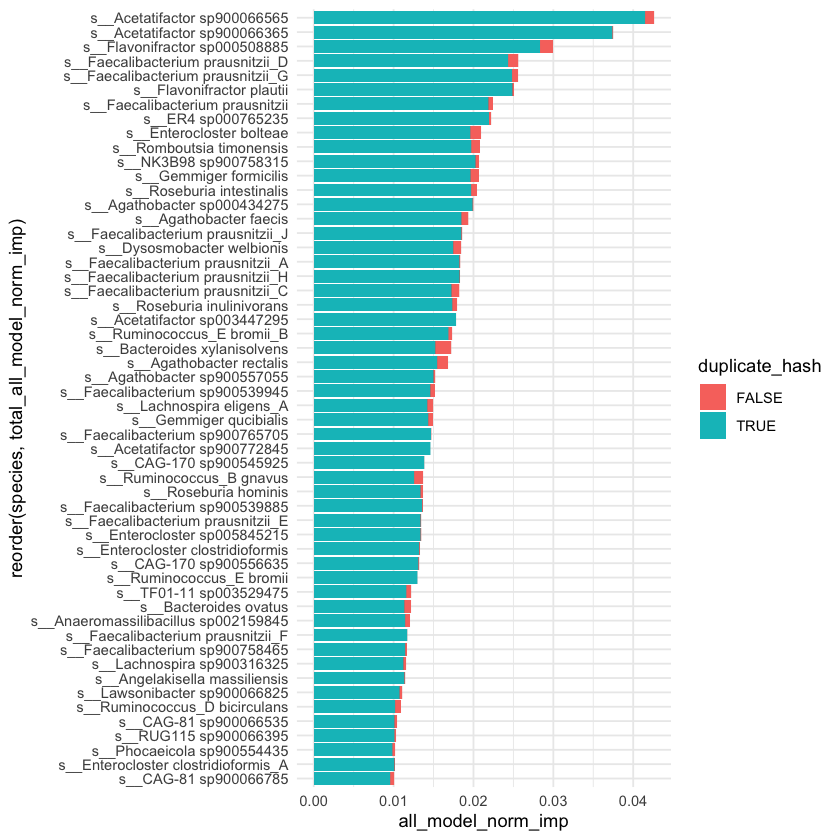

In [13]:
varimp_tmp <- varimp %>% filter(!is.na(name))
#pdf("tmp_varimp.pdf", width = 10, height = 30)
ggplot(varimp_tmp, aes(x = reorder(species, total_all_model_norm_imp), 
                        y = all_model_norm_imp, fill=duplicate_hash)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  coord_flip()
#dev.off()

### calculate percentage of total importance if 1% threshold is used 

In [14]:
top_imp_genomes <- name_imp %>%
  filter(total_all_model_norm_imp >= 0.01) 

tmp <- varimp %>%
  filter(name %in% top_imp_genomes$name) %>%
  select(hash, all_model_norm_imp) %>%
  distinct()
sum(tmp$all_model_norm_imp)  

tmp

[1] 1

hash,all_model_norm_imp
<dbl>,<dbl>
3.902119e+09,3.242310e-07
1.855114e+11,1.279567e-07
5.122572e+11,0.000000e+00
5.594654e+11,6.187150e-07
6.519952e+11,4.208318e-07
9.207193e+11,8.563312e-08
1.089920e+12,1.690400e-07
1.119237e+12,6.718816e-07
1.182788e+12,2.148313e-07


### lineage sheet

In [15]:
charcoal_lineages <- varimp %>%
  select(name, superkingdom, phylum, class, order, family, genus, species) %>%
  distinct() %>%
  filter(!is.na(name)) %>%
  mutate(filename = gsub(" .*", "_genomic.fna.gz", name)) %>%
  mutate(superkingdom = gsub("Eukaryota", "d__Eukaryota", superkingdom)) %>%
  select(filename, superkingdom, phylum, class, order, family, genus, species)
write_csv(charcoal_lineages, "sandbox/test_charcoal/lineages.csv", col_names = F)